In [67]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [68]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [69]:
#Part 1

dfLE.dropna(axis=0, inplace=True)
dfLE["GDPPerCapita"] = (dfLE["GDP"]/dfLE["Population"])
dfLE[["Country", "GDPPerCapita"]].sample(10).sort_index()


,Country,GDPPerCapita
2,Algeria,3392.912329
17,Benin,385.922328
27,CaboVerde,2271.693565
34,China,2507.205212
58,Fiji,2915.548676
70,Guinea-Bissau,367.528747
77,Indonesia,2341.243997
117,Nepal,441.919527
131,Peru,2330.930918
155,SolomonIslands,996.233269


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

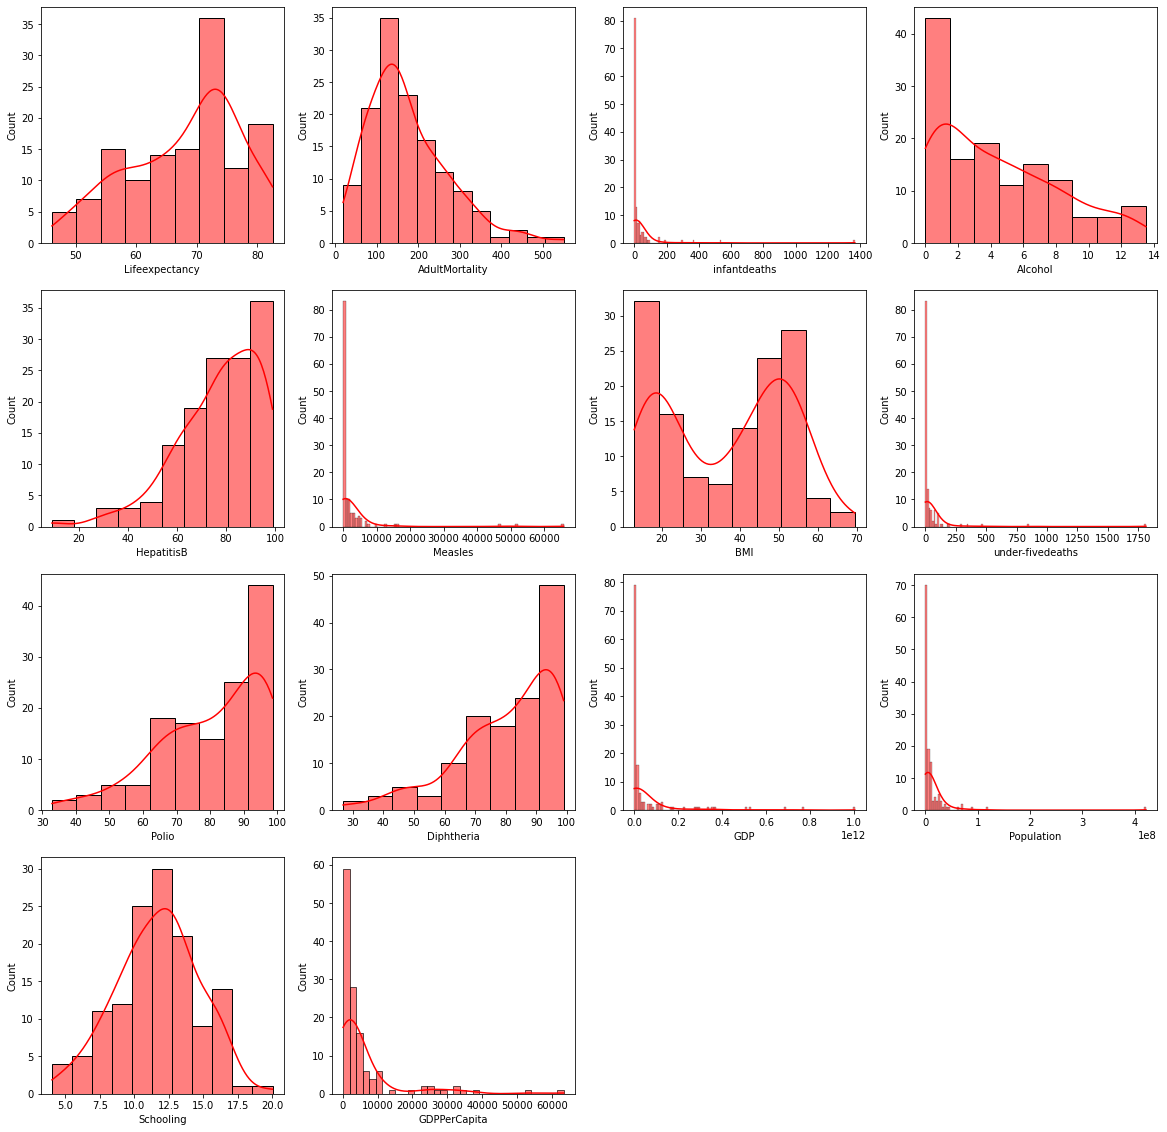

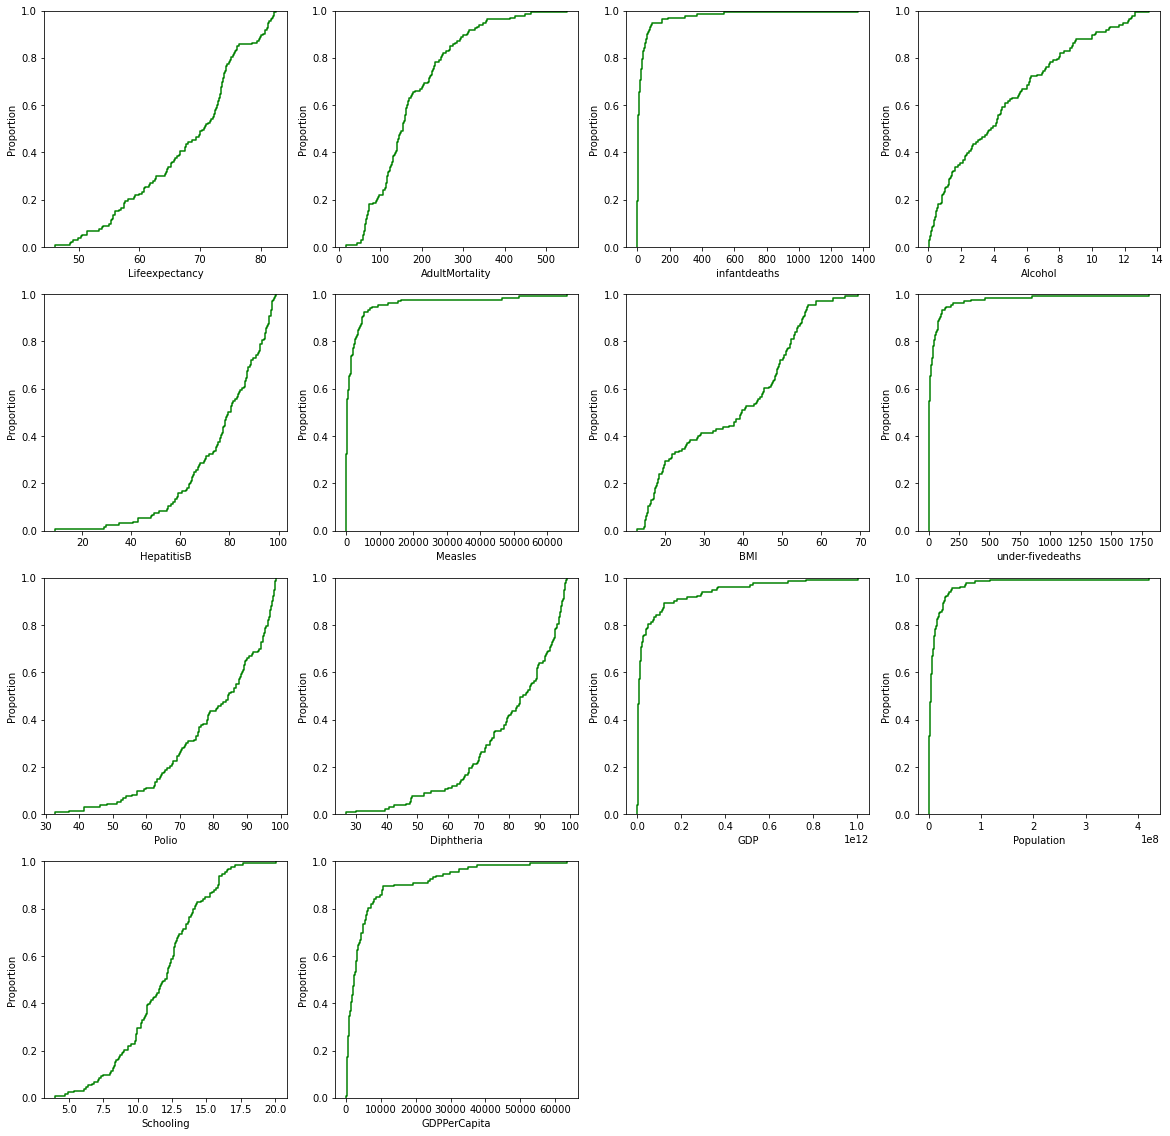

In [70]:
#Creating Density Distribution
df = dfLE.drop(columns=["Country","isDeveloped"])
Number_Of_Columns = 1
plt.figure(figsize=(20,20))
for i in df.columns:
    plt.subplot(4,4,Number_Of_Columns)
    sns.histplot(df[i],color="Red", kde = True)
    Number_Of_Columns= Number_Of_Columns + 1
plt.tight_layout 

#Creating Cummulative Distribution
df = dfLE.drop(columns=["Country","isDeveloped"])
Number_Of_Columns=1
plt.figure(figsize=(20,20))
for i in df.columns:
    plt.subplot(4,4,Number_Of_Columns)
    sns.ecdfplot(data=df[i], color="Green")
    Number_Of_Columns=Number_Of_Columns+1
plt.tight_layout

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

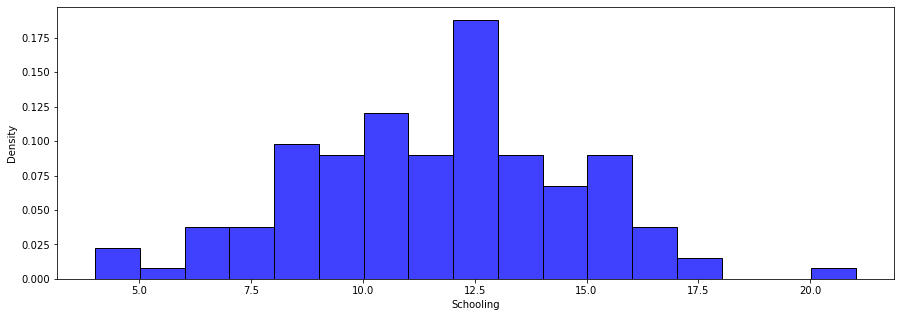

In [71]:
#Plotting the histogram Distribution 
sns.histplot(data = round(dfLE["Schooling"],4), binwidth = 1, color="blue", stat="density")

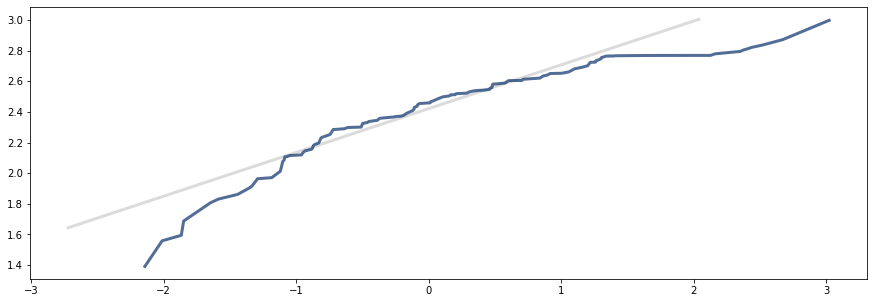

In [72]:
# Plotting normal distribution
norm_Schooling = np.log(dfLE["Schooling"])
thinkstats2.NormalProbabilityPlot(norm_Schooling)

In [73]:
# From the above histogram plotted, the school dataset looks considerably normal
#Testing to confirm 
k2, p = ss.normaltest(dfLE["Schooling"])
print("The value for P is:", p)


The value for P is: 0.8061408621435778


<AxesSubplot:xlabel='Schooling', ylabel='Density'>

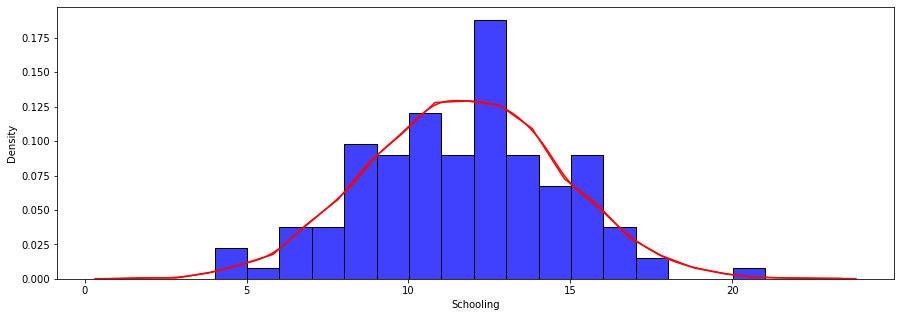

In [74]:
#Analytical for Schooling
#Analytical (Red) distribution for schooling 
#Empirical(Blue) distribution for schooling
mu_schooling = dfLE["Schooling"].mean()
sigma_schooling = dfLE["Schooling"].std()
norm_schooling = ss.norm(mu_schooling, sigma_schooling)
plt.clf()
sns.histplot(data = norm_schooling.rvs(10000), binwidth = 1, color="red", stat="density", kde = True, element="poly", fill = False)
sns.histplot(data = round(dfLE["Schooling"],4), binwidth = 1, color="blue", stat="density")


In [75]:
#Percentage that have a schooling level within 1 year of Canada. 

Index_can = dfLE.index[dfLE["Country"] == "Canada"]
SchoolingCanada = dfLE.loc[Index_can.values[0], "Schooling"]
print(SchoolingCanada,"Years")

Prediction = norm_schooling.cdf(SchoolingCanada + 1) - norm_schooling.cdf(SchoolingCanada - 1)
print("Prediction is:", np.round(Prediction,2), "%")

EmpCdf_School = thinkstats2.Cdf(dfLE["Schooling"])
Canada = EmpCdf_School.PercentileRank(SchoolingCanada + 1) - EmpCdf_School.PercentileRank(SchoolingCanada - 1)
print("The Accurate percentge is:", np.round(Canada, 2),"%")

15.875 Years
Prediction is: 0.1 %
The Accurate percentge is: 13.53 %


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

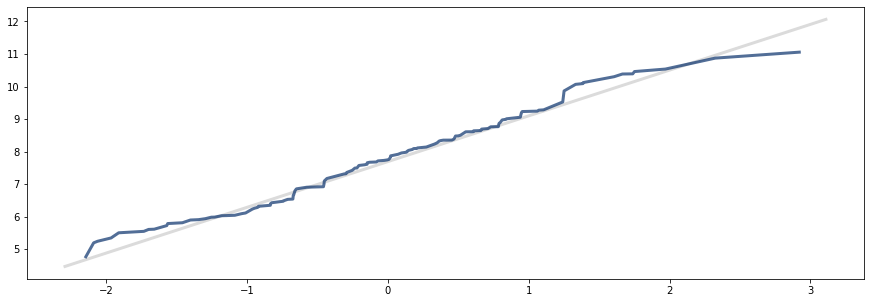

In [76]:
# Plotting normal distribution
norm_GdpPerCapita_log = np.log(dfLE["GDPPerCapita"])
thinkstats2.NormalProbabilityPlot(norm_GdpPerCapita_log)

<AxesSubplot:xlabel='GDPPerCapita', ylabel='Density'>

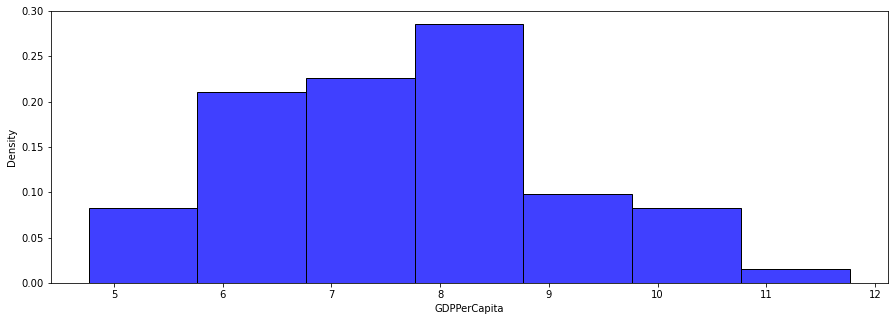

In [77]:
sns.histplot(data = round(norm_GdpPerCapita_log,4), binwidth = 1, color="blue", stat="density")

<AxesSubplot:xlabel='GDPPerCapita', ylabel='Proportion'>

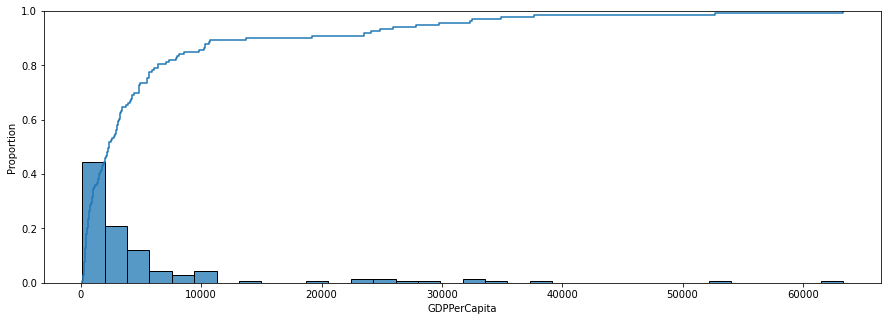

In [78]:
#Analytical for GdpPerCapita 
sns.ecdfplot(dfLE["GDPPerCapita"])
sns.histplot(dfLE["GDPPerCapita"], stat="proportion")

This looks like an exponential distribution.

<AxesSubplot:xlabel='GDPPerCapita', ylabel='Proportion'>

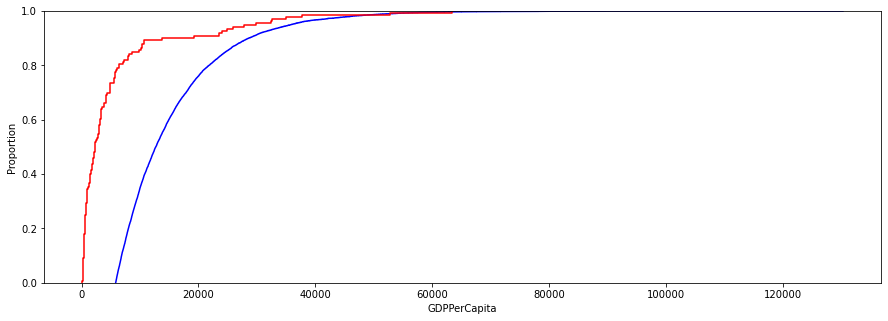

In [79]:
#Plotting for Analytical(exponential) and empirical(exponential) distribution
#Blue and Red respectively 

Analytical_Expo = ss.expon(scale=np.std(dfLE["GDPPerCapita"]), loc=np.mean(dfLE["GDPPerCapita"]))
sns.ecdfplot(Analytical_Expo.rvs(10000), color="Blue")
sns.ecdfplot(dfLE["GDPPerCapita"], color="Red")

using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


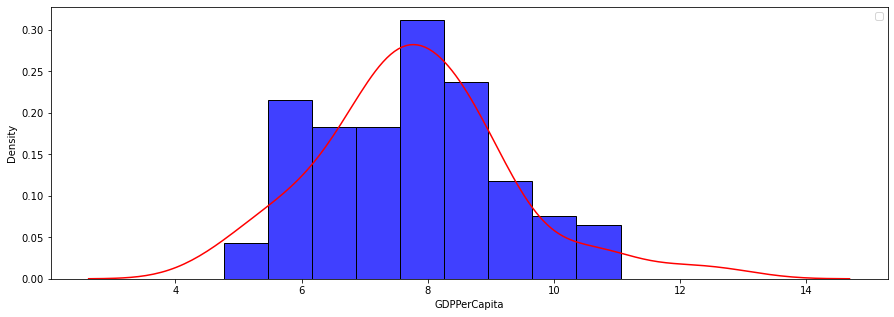

In [80]:
norm_GdpPerCapita_log
sns.histplot(norm_GdpPerCapita_log, color="blue", stat="density")
norm = ss.norm(norm_GdpPerCapita_log.mean(),norm_GdpPerCapita_log.std())
sns.kdeplot(norm.rvs(len(norm_GdpPerCapita_log)), color="red", fill=False)
plt.legend()


This view doesnt seem to be accurate

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [81]:
dfLE.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,1.330000e+02,133.000000,133.000000
mean,0.142857,68.139709,174.300282,35.902726,4.436893,77.272061,2657.467105,36.691964,49.817199,80.572006,80.699919,6.023285e+10,1.340066e+07,11.691823,5831.130877
std,0.351250,9.254200,97.065845,133.819254,3.736886,17.174868,8473.612218,15.971021,181.414641,15.732438,16.431339,1.506979e+11,3.972571e+07,3.006460,10101.737928
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,8.988098e+06,3.334250e+03,4.018750,117.466394
25%,0.000000,60.862500,114.312500,0.687500,1.074667,66.500000,15.125000,19.293750,1.000000,69.625000,70.500000,1.213512e+09,1.007302e+06,9.868750,685.958218
50%,0.000000,70.731250,154.312500,3.312500,3.807333,79.600000,251.937500,39.743750,4.000000,84.375000,84.500000,6.161290e+09,3.735507e+06,12.000000,2306.960717
75%,0.000000,74.262500,227.750000,23.250000,7.130000,91.812500,1880.812500,50.893750,35.562500,94.812500,95.000000,2.698236e+10,1.124072e+07,13.725000,5490.517494
max,1.000000,82.518750,550.062500,1366.687500,13.497333,98.875000,65857.937500,69.431250,1812.500000,98.562500,98.937500,1.004677e+12,4.214677e+08,20.037500,63337.610450


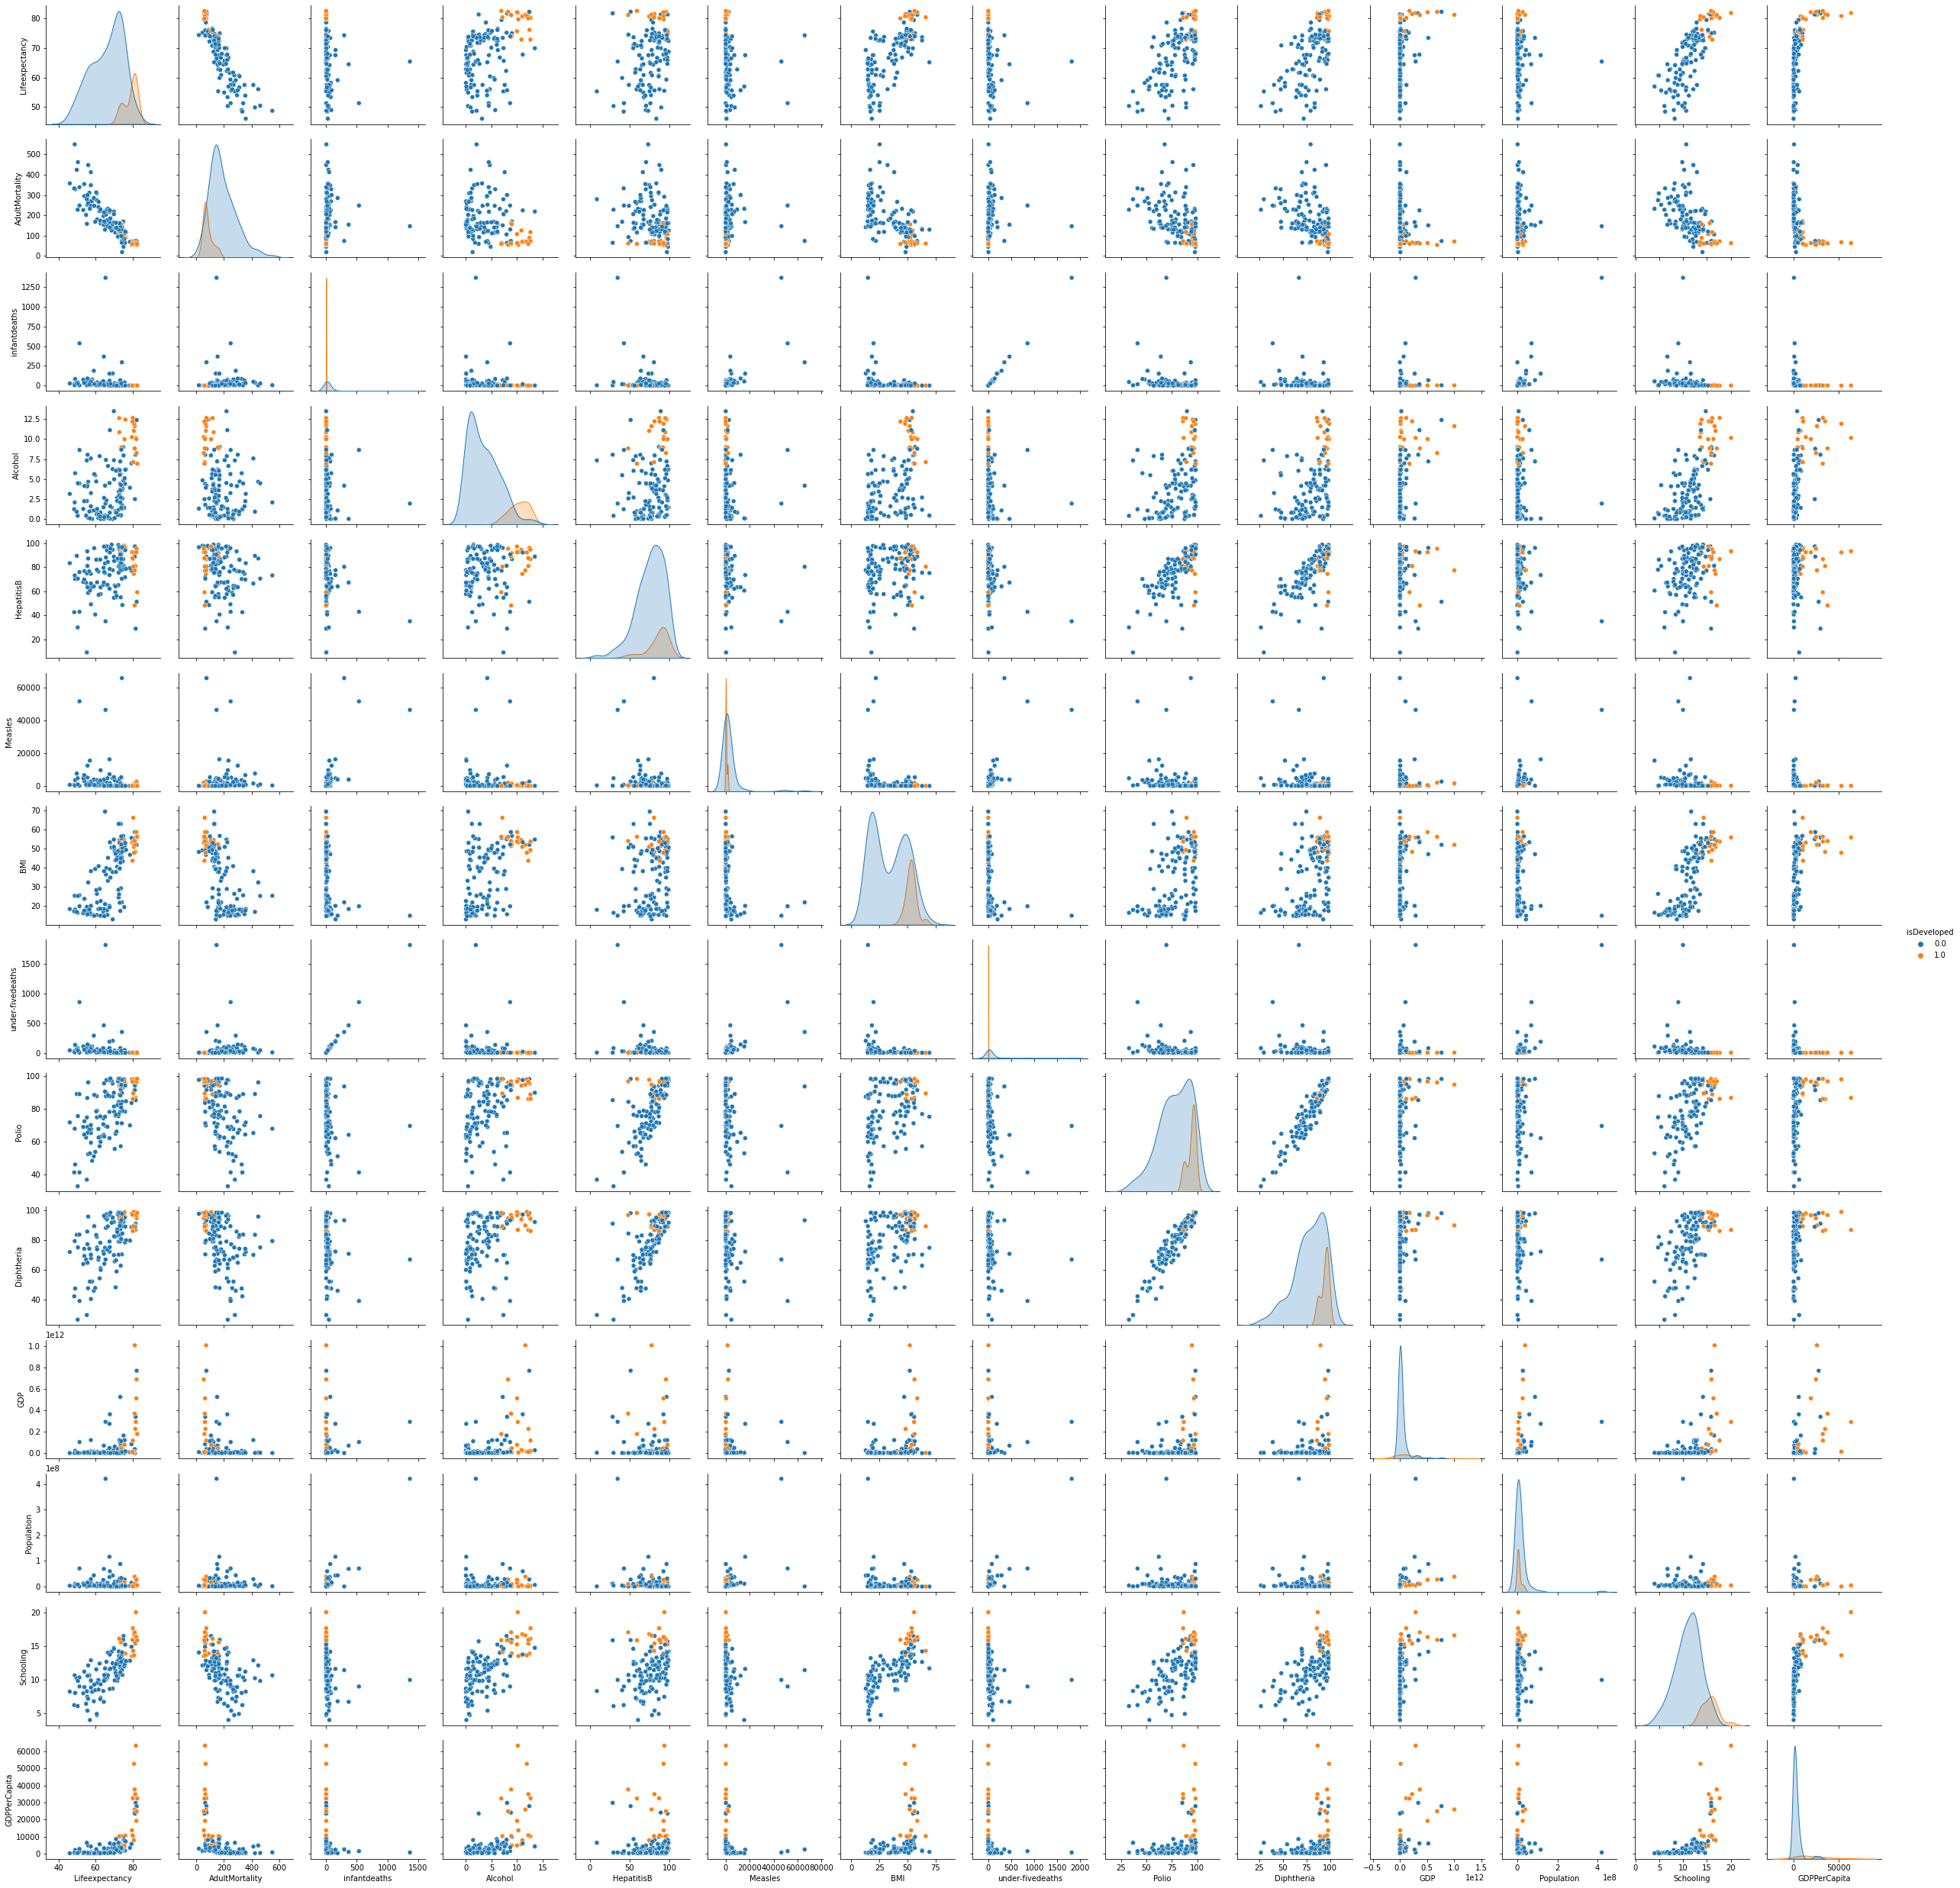

In [82]:
#Visualize correlations. 
sns.pairplot(dfLE, dropna= True,hue="isDeveloped")

Filtered measles above 10000 and adultmortality above 500. Filtered Infant deaths and under-five deaths above 200 which is higher than median. Filtered population, GDP, GDP/Capita , since it is positively skewed and mean is way higher than median.

Removed the Country column it is not numerical data and doesn't provide anything valueable to the pair plot.
Removed under-fivedeaths and infantdeaths that were above 250, as that got rid of a few big outliers which were draging the mean too high
Removed Population that were above 60 000 000
Removed all NaN so because it is not a value and won't compare easily.

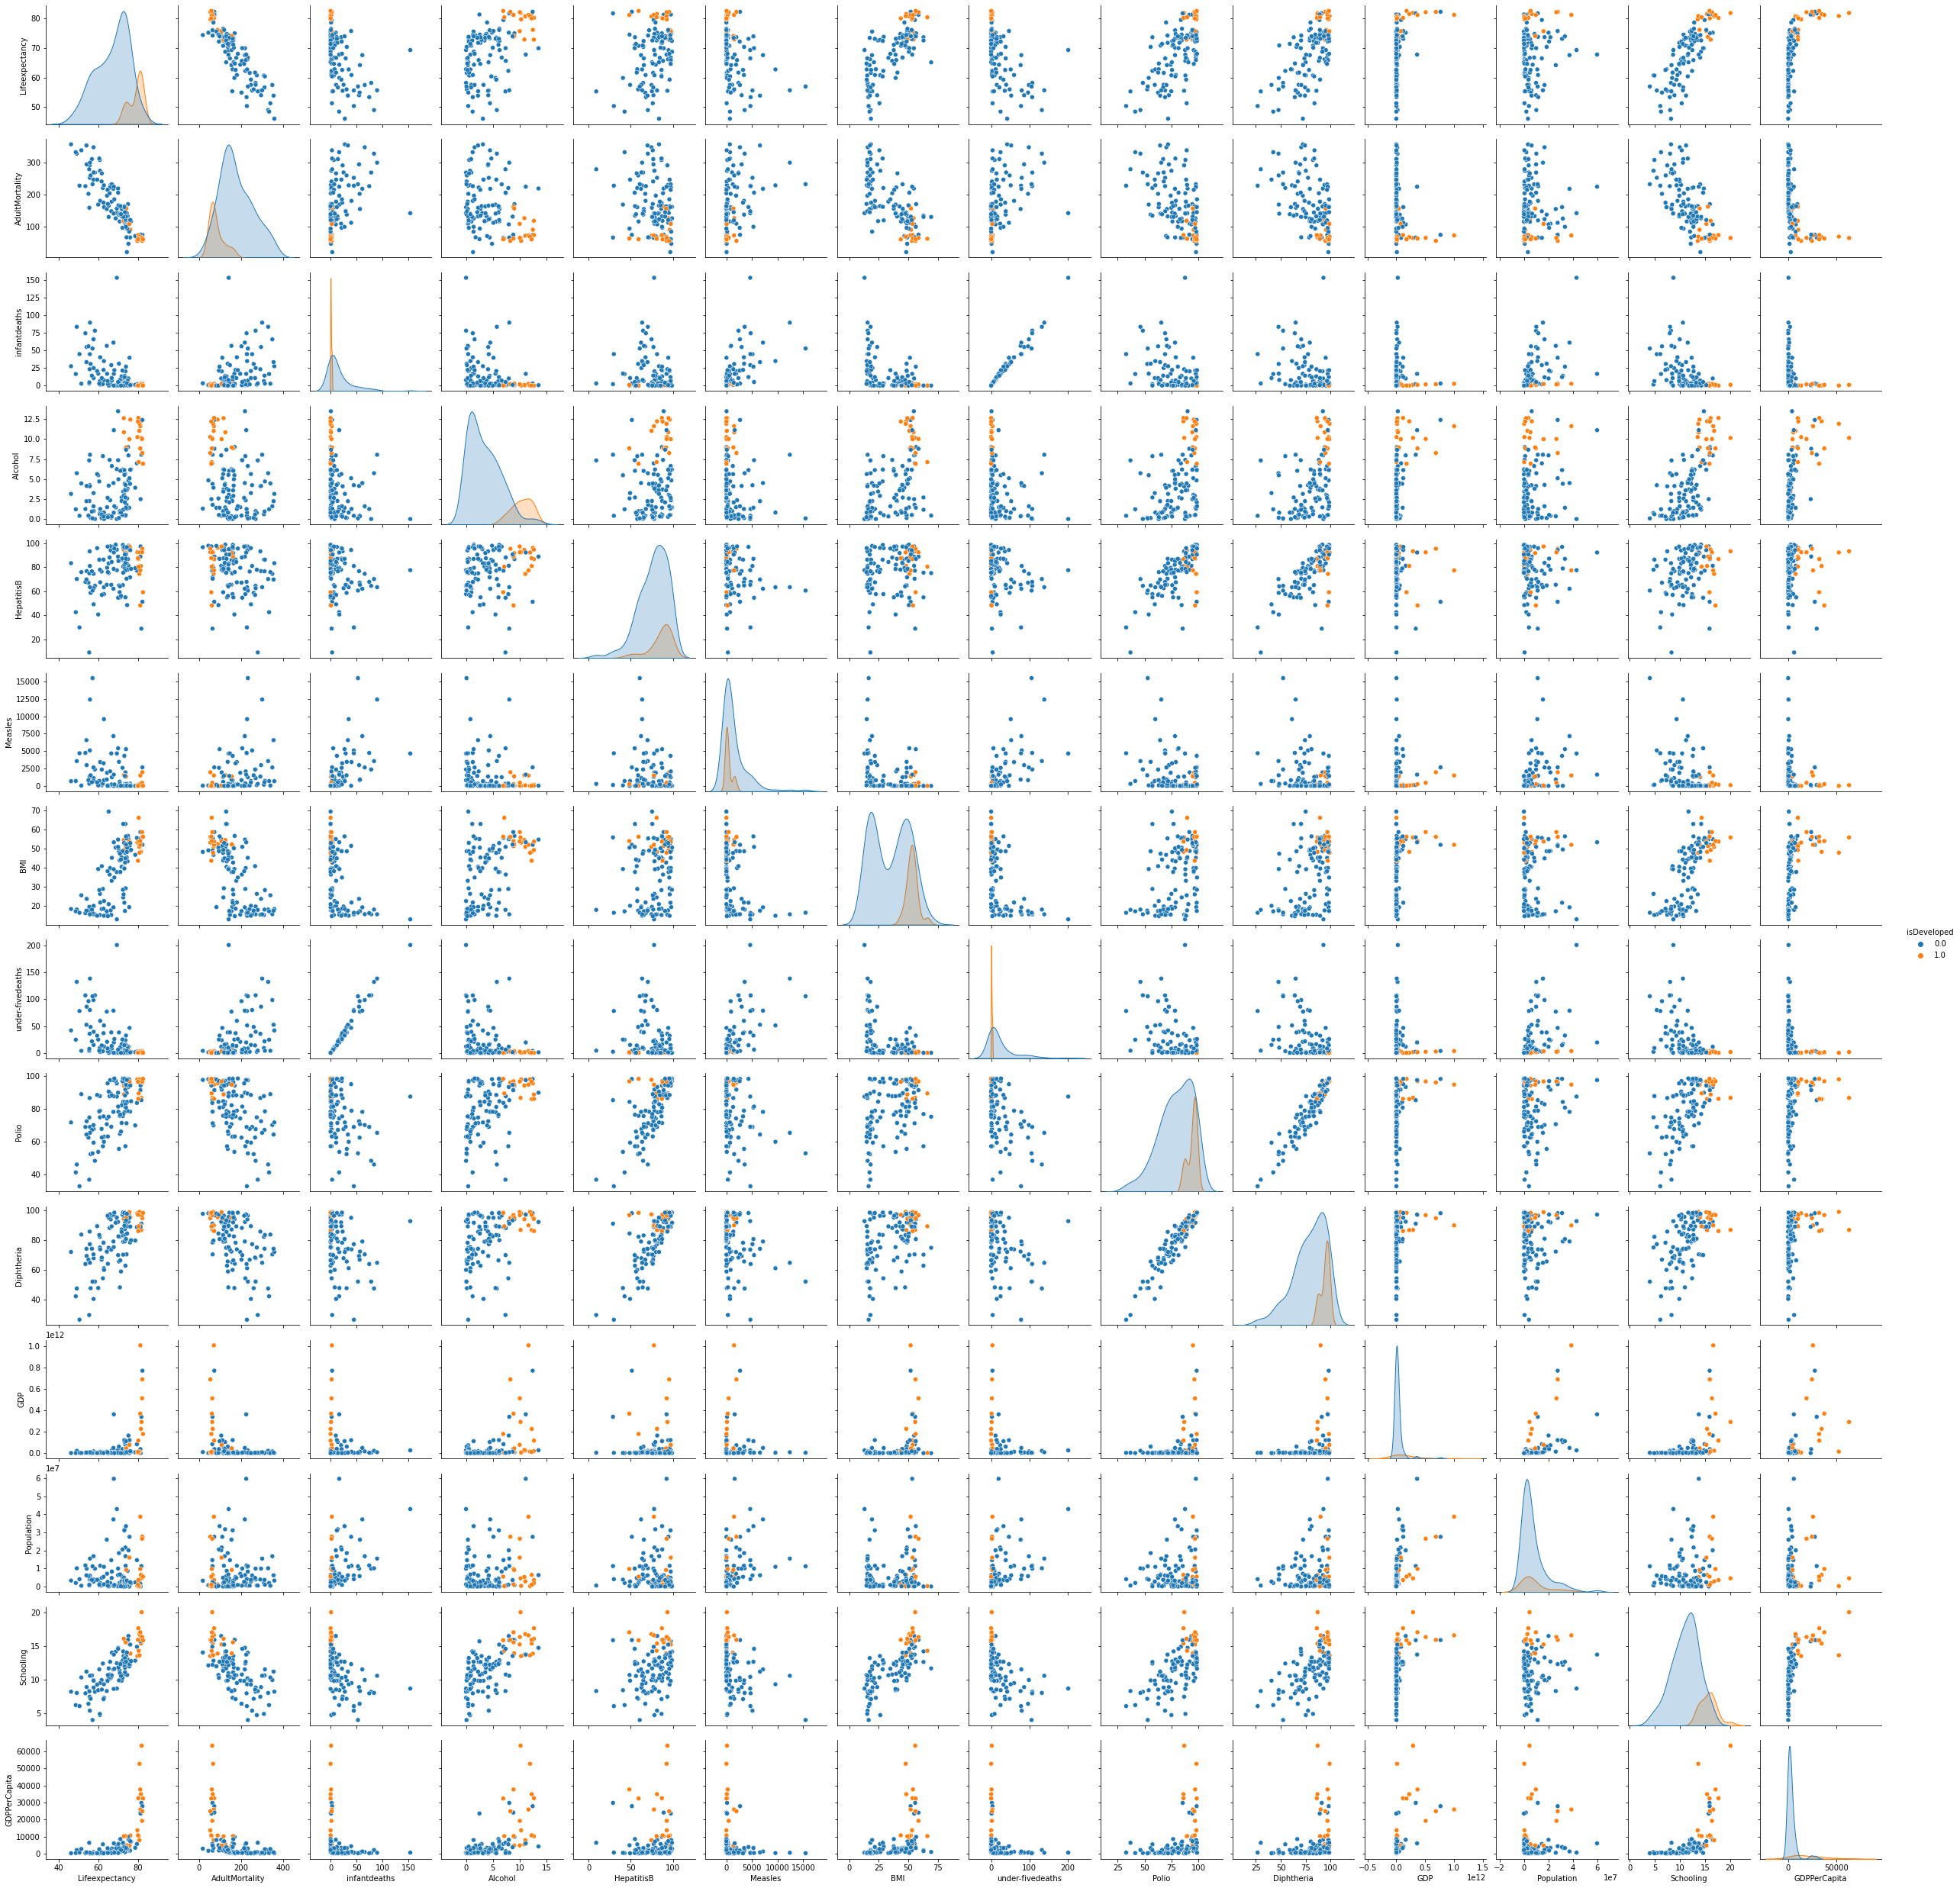

In [83]:
#Filtering The data
# i filtered the population above 75,000,000.00, infantdeaths above 200, 
# under-fivedeaths above 250 which got rid of some outliers in the mean.
#Also filtered the AdultMortality above 400

dfLE = dfLE[dfLE["Population"] < 75000000]
dfLE = dfLE[dfLE["infantdeaths"] < 200]
dfLE = dfLE[dfLE["under-fivedeaths"] < 250]
dfLE = dfLE[dfLE["AdultMortality"] < 400]
sns.pairplot(dfLE, dropna= True,hue="isDeveloped")
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

Correlation heatmap for Developed

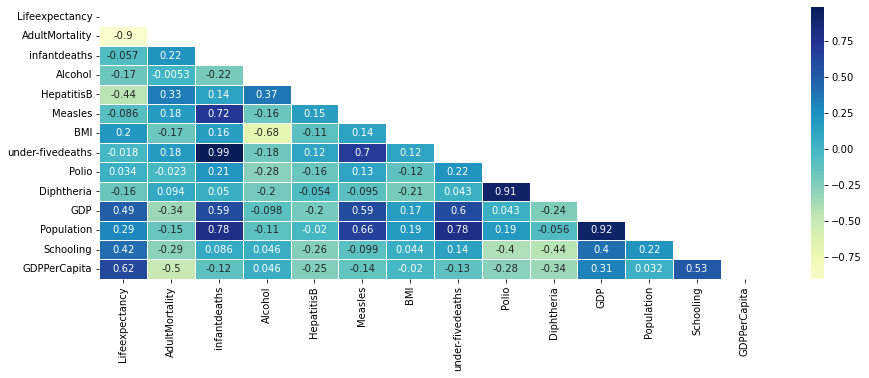

In [84]:
#Calculate correlations and analyze. 
dfcorrel_Dev = dfLE.apply(pd.to_numeric, errors="coerce")
dfcorrel_Dev = dfcorrel_Dev[dfcorrel_Dev["isDeveloped"] == 1]
dfcorrel_Dev = dfcorrel_Dev.drop(columns=["Country","isDeveloped"])
dfcorrel_Dev = dfcorrel_Dev.corr()
mask = np.triu(np.ones_like(dfcorrel_Dev, dtype=bool))
sns.heatmap(dfcorrel_Dev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

Not Developed Correlation Heatmap 

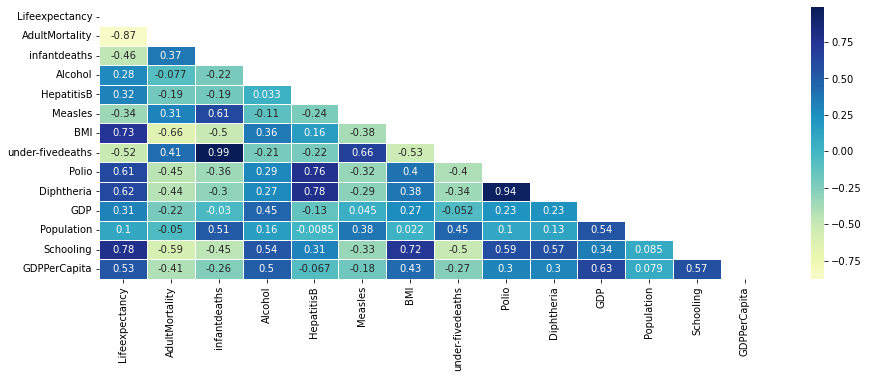

In [85]:

dfcorrel_NDev = dfLE.apply(pd.to_numeric, errors="coerce")
dfcorrel_NDev = dfcorrel_NDev[dfcorrel_NDev["isDeveloped"] == 0]
dfcorrel_NDev = dfcorrel_NDev.drop(columns=["Country","isDeveloped"])
dfcorrel_NDev = dfcorrel_NDev.corr()
mask = np.triu(np.ones_like(dfcorrel_Dev, dtype=bool))
sns.heatmap(dfcorrel_NDev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

In [86]:
df_Dev=dfLE[dfLE["isDeveloped"]==1]
print("AdultMortality_LifeExpectancy is:", thinkstats2.Corr(df_Dev["AdultMortality"], df_Dev["Lifeexpectancy"]),    "SpearmanCorr:", thinkstats2.SpearmanCorr(df_Dev["AdultMortality"], df_Dev["Lifeexpectancy"]))
print("GDP_LifeExpectancy is:", thinkstats2.Corr(df_Dev["Lifeexpectancy"],df_Dev["GDPPerCapita"] ), "SpearmanCorr:", thinkstats2.SpearmanCorr(df_Dev["GDPPerCapita"], df_Dev["Lifeexpectancy"]))
print("HepatitisB_LifeExpectancy is:", thinkstats2.Corr(df_Dev["HepatitisB"], df_Dev["Lifeexpectancy"]),    "SpearmanCorr:", thinkstats2.SpearmanCorr(df_Dev["HepatitisB"], df_Dev["Lifeexpectancy"]))


AdultMortality_LifeExpectancy is: -0.8993592069981189 SpearmanCorr: -0.6701754385964912
GDP_LifeExpectancy is: 0.6204988062972085 SpearmanCorr: 0.712280701754386
HepatitisB_LifeExpectancy is: -0.44469460051415044 SpearmanCorr: -0.3859649122807018


Three strongest correlation for developed countries include

AdultMortality : -0.89

GDPPerCapita : 0.62

HepatitisB : -0.44 

In [87]:
df_NDev=dfLE[dfLE["isDeveloped"]==0]
print("AdultMortality_LifeExpectancy is:", thinkstats2.Corr(df_NDev["AdultMortality"], df_NDev["Lifeexpectancy"]),  "SpearmanCorr:", thinkstats2.SpearmanCorr(df_NDev["AdultMortality"], df_NDev["Lifeexpectancy"]))
print("Schooling_LifeExpectancy is:", thinkstats2.Corr(df_NDev["Schooling"], df_NDev["Lifeexpectancy"]),    "SpearmanCorr:", thinkstats2.SpearmanCorr(df_NDev["Schooling"], df_NDev["Lifeexpectancy"]))
print("BMI_LifeExpectancy is:", thinkstats2.Corr(df_NDev["Lifeexpectancy"],df_NDev["BMI"] ),    "SpearmanCorr:", thinkstats2.SpearmanCorr(df_NDev["BMI"], df_NDev["Lifeexpectancy"]))


AdultMortality_LifeExpectancy is: -0.8742625963625729 SpearmanCorr: -0.8829598048375417
Schooling_LifeExpectancy is: 0.7778353363778241 SpearmanCorr: 0.7945003308071175
BMI_LifeExpectancy is: 0.7324811402430945 SpearmanCorr: 0.7377459365431797


Three strongest correlation for NOT-developed countries include

AdultMortality : -0.87

Schooling : 0.77

BMI : -0.73

10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?

1. According to my result set, the correlation between Adult Mortality and Life Expectancy appears to be casual in both Developed and Not Developed countries.

2. I think due to the fact that developed countries are richer thus are less susceptible to food insecurity, Hence with  high BMI. 

3. Again i think since developed countries are more educated, the awarenes of healthcare is broad thereby improving life expectancy as compared to not developed countries.




10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

1. HepatitisB

An adult with Hepatitis B is less likely to die in developed countries as opposed to developing countries.

2. Polio 

The same can be said for Polio. many children in developing countries are at risk of polio due to limited vaccination and even less awareness of the disease especially in rural areas. whereas in developed countries the risk are almost non existent



